# 4.2 워드클라우드

### 4.2.1 워드 클라우드를 만드는 과정

In [1]:
# 예제 4-10 크롤링 결과 중 해시태그 데이터 불러오기
import pandas as pd
raw_total = pd.read_excel('./files/3_1_crawling_raw.xlsx')
raw_total['tags'] [:3]

0                                                   []
1    ['#포항dslr클럽', '#포항', '#일출궤적', '#포항', '#포항관광', ...
2    ['#해랑이떡', '#福', '#포항여행', '#먹거리', '#포항큰동해시장', '...
Name: tags, dtype: object

In [2]:
# 예제 4-11 해시태그 통합 저장하기
tags_total = []

for tags in raw_total['tags']:
    tags_list = tags[2:-2].split("', '")
    for tag in tags_list:
        tags_total.append(tag)

### 4.2.3 해시태그 출현 빈도 집계

In [3]:
# 예제 4-12 빈도수 집계하기(Counter)
from collections import Counter
tag_counts = Counter(tags_total)

In [4]:
# 예제 4-13 가장 많이 사용된 해시태그 살펴보기 
tag_counts.most_common(50)

[('', 4),
 ('#포항', 4),
 ('#포항여행', 4),
 ('#포항맛집', 4),
 ('#포항관광', 3),
 ('#해랑이떡', 2),
 ('#포항큰동해시장', 2),
 ('#큰동해시장', 2),
 ('#포항전통시장', 2),
 ('#포항명소', 2),
 ('#포항놀곳', 2),
 ('#문화관광형시장', 2),
 ('#먹방', 2),
 ('#포항dslr클럽', 1),
 ('#일출궤적', 1),
 ('#영일대해수욕장', 1),
 ('#브로니카SQ-Ai', 1),
 ('#코닥E100vs', 1),
 ('#nd1000000', 1),
 ('#T셔터', 1),
 ('#bronicasqai', 1),
 ('#Bronica', 1),
 ('#福', 1),
 ('#먹거리', 1),
 ('#해도떡방아', 1),
 ('#알럽', 1),
 ('#먹스타그램', 1),
 ('#맛있다그램', 1),
 ('#맛스타그램...', 1),
 ('#전통시장', 1),
 ('#운하', 1),
 ('#진심저울', 1),
 ('#체크인유럽', 1),
 ('#포항_행복은다운처럼🌿', 1),
 ('#waymaker', 1),
 ('#promisekeeper', 1),
 ('#lightinthedarkness', 1),
 ('#miracleworker', 1),
 ('#filmphoto', 1),
 ('#35mm', 1),
 ('#analogphotography', 1),
 ('#nikonphotography', 1),
 ('#필름사진', 1),
 ('#필카사진', 1),
 ('#필름', 1),
 ('#필카', 1),
 ('#필름감성', 1),
 ('#죽도시장맛집', 1),
 ('#포항대게', 1),
 ('#포항물회', 1)]

In [5]:
# 예제 4-14 데이터 정제하기
STOPWORDS = ['#일상', '#선팔', '#포항', '#pohang']

tag_total_selected = []
for tag in tags_total:
    if tag not in STOPWORDS:
        tag_total_selected.append(tag)
        
tag_counts_selected = Counter(tag_total_selected)
tag_counts_selected.most_common(10)


[('', 4),
 ('#포항여행', 4),
 ('#포항맛집', 4),
 ('#포항관광', 3),
 ('#해랑이떡', 2),
 ('#포항큰동해시장', 2),
 ('#큰동해시장', 2),
 ('#포항전통시장', 2),
 ('#포항명소', 2),
 ('#포항놀곳', 2)]

### 4.2.4 막대차트로 해시태그 살펴보기

In [6]:
# 예제 4-15 시각화 라이브러리 호출 및 환경 설정(한글 폰트)
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
import sys

if sys.platform in ["win32", "win64"]:
    font_name = "malgun gothic"
elif sys.platform == "darwin":
    font_name = "AppleGothic"

rc('font',family=font_name)


In [7]:
# 예제 4-16 데이터 준비하기
tag_counts_df = pd.DataFrame(tag_counts_selected.most_common(30))
tag_counts_df.columns = ['tags', 'counts']

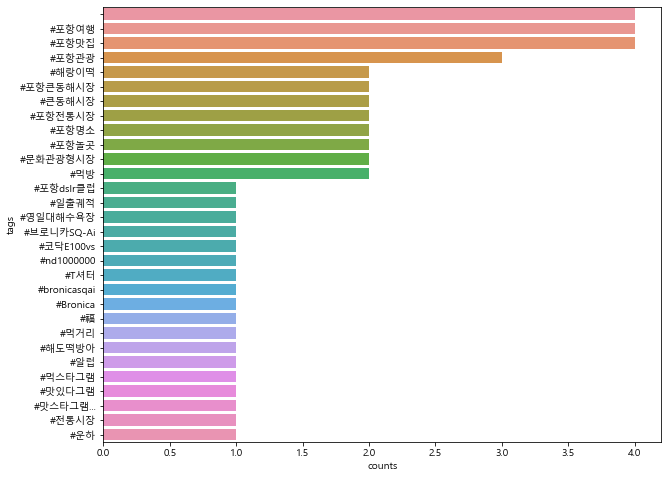

In [8]:
# 예제 4-17 막대 차트 그리기
plt.figure(figsize=(10,8)) 
sns.barplot(x='counts', y='tags', data = tag_counts_df)

### 4.2.5 워드 클라우드 그리기

In [9]:
!pip install wordcloud

In [10]:
# 예제 4-18 워드클라우드 라이브러리 불러오기
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import platform

if platform.system() == 'Windows':   #윈도우의 경우
    font_path = "c:/Windows/Fonts/malgun.ttf"
elif platform.system() == "Darwin":   #Mac 의 경우
    font_path = "/Users/$USER/Library/Fonts/AppleGothic.ttf"


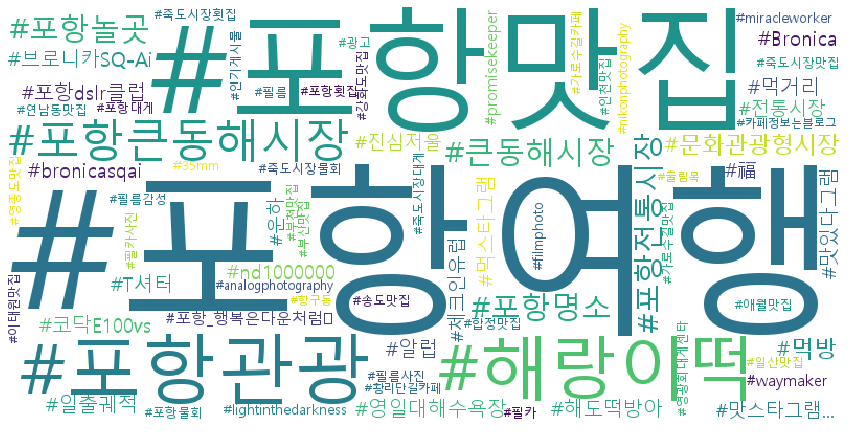

In [11]:
# 예제 4-19 워드클라우드 만들기
wordcloud=WordCloud(font_path= font_path, 
                    background_color="white",
                    max_words=100,
                    relative_scaling= 0.3,
                    width = 800,
                    height = 400
                 ).generate_from_frequencies(tag_counts_selected)  
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('./files/3_2_tag-wordcloud.png')  